Task2-Colour identification in images

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

Loading the Images

In [4]:
image = cv2.imread("C:\\Users\\LENOVO\\Downloads\\colour picture.jpg")
cv2.imshow('i',image)
cv2.waitKey(0)

-1

The type of this input is <class 'numpy.ndarray'>
Shape: (168, 299, 3)


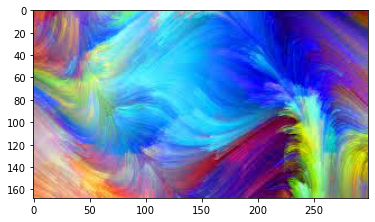

In [5]:
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

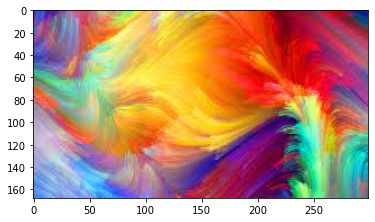

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

BGR TO GRAY

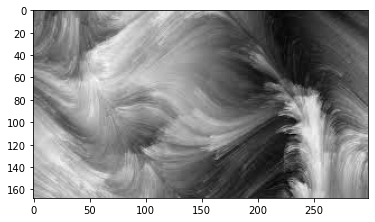

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

RESIZING  THE IMAGES

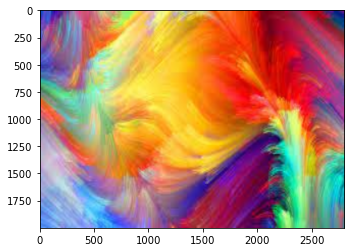

In [8]:
resized_image = cv2.resize(image, (2800, 2000))
plt.imshow(resized_image)

COLOR IDENTIFICATION

In [9]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [10]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [11]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

no of clusters=no of colors=10

In [12]:
clf = KMeans(n_clusters = 10)
labels = clf.fit_predict(modified_image)

([<matplotlib.patches.Wedge at 0x1babef75f70>,
 [Text(1.0723913992184428, 0.24490138195263522, '#c2ce8b'),
  Text(0.757826903612494, 0.7973069573013268, '#f5c536'),
  Text(0.2301251671217395, 1.075659057256151, '#876a98'),
  Text(-0.24280931541725168, 1.072867017083947, '#e0220f'),
  Text(-0.7548890753223153, 0.8000890475184746, '#eb7317'),
  Text(-1.0756078187741238, 0.23036453761803644, '#4d2071'),
  Text(-0.9052401056877787, -0.6249322771743987, '#90b4da'),
  Text(-0.0683510924644607, -1.097874368112725, '#9b1c47'),
  Text(0.6396481530914313, -0.894902363527285, '#c97664'),
  Text(1.0384535814032492, -0.36278665806609495, '#3cbb9b')])

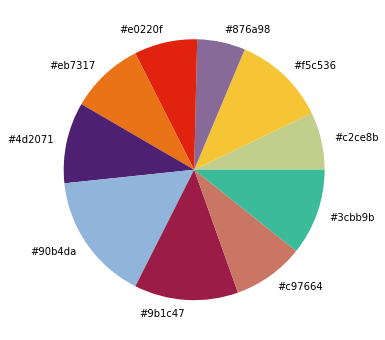

In [13]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

#if (show_chart):
plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

#return rgb_colors